In [5]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(color_codes=True)

## Loading dataset

In [6]:
source = pd.read_csv("https://raw.githubusercontent.com/sreekeshiyer/dmbi_aids_datasets/main/car_sales.csv")

In [7]:
source.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Data Preprocessing

Handling Missing and Duplicate Data

In [8]:
df = source
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [9]:
df['Engine HP'].fillna(df['Engine HP'].mean(),inplace=True)
df['Engine Cylinders'].fillna(df['Engine Cylinders'].mean(),inplace=True)
df['Number of Doors'].fillna(df['Number of Doors'].mode()[0],inplace=True)

In [10]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP               0
Engine Cylinders        0
Transmission Type       0
Driven_Wheels           0
Number of Doors         0
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [11]:
df = df.dropna()

In [12]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [13]:
df.duplicated().sum()

349

## Handling outliers

(0.0, 1.0, 0.0, 1.0)

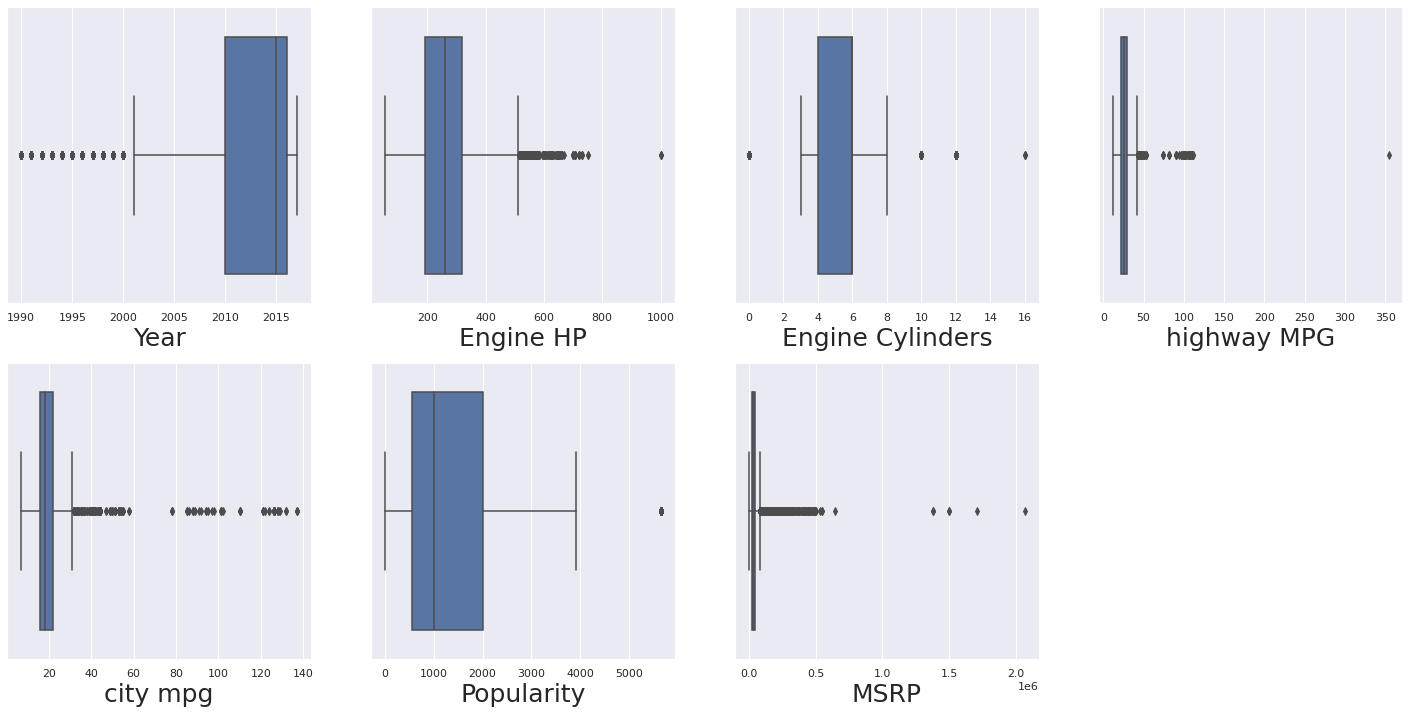

In [14]:
data = df
fig, axes =plt.subplots(2,4,figsize=(25,12))
ax= sns.boxplot(x="Year",data=data,ax=axes[0,0])
ax.set_xlabel("Year",fontsize=25)
ax= sns.boxplot(x="Engine HP",data=data,ax=axes[0,1])
ax.set_xlabel("Engine HP",fontsize=25)
ax= sns.boxplot(x="Engine Cylinders",data=data,ax=axes[0,2])
ax.set_xlabel("Engine Cylinders",fontsize=25)
ax= sns.boxplot(x="highway MPG",data=data,ax=axes[0,3])
ax.set_xlabel("highway MPG",fontsize=25)
ax= sns.boxplot(x="city mpg",data=data,ax=axes[1,0])
ax.set_xlabel("city mpg",fontsize=25)
ax= sns.boxplot(x="Popularity",data=data,ax=axes[1,1])
ax.set_xlabel("Popularity",fontsize=25)
ax= sns.boxplot(x="MSRP",data=data,ax=axes[1,2])
ax.set_xlabel("MSRP",fontsize=25)
axes[-1, -1].axis('off')

In [15]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1 #to get the interquartile range
print(IQR)

Year                    6.0
Engine HP             127.0
Engine Cylinders        2.0
Number of Doors         2.0
highway MPG             8.0
city mpg                6.0
Popularity           1460.0
MSRP                22832.5
dtype: float64


In [16]:
#getting rid of the data that falls outside the inter quartile range 
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


(0.0, 1.0, 0.0, 1.0)

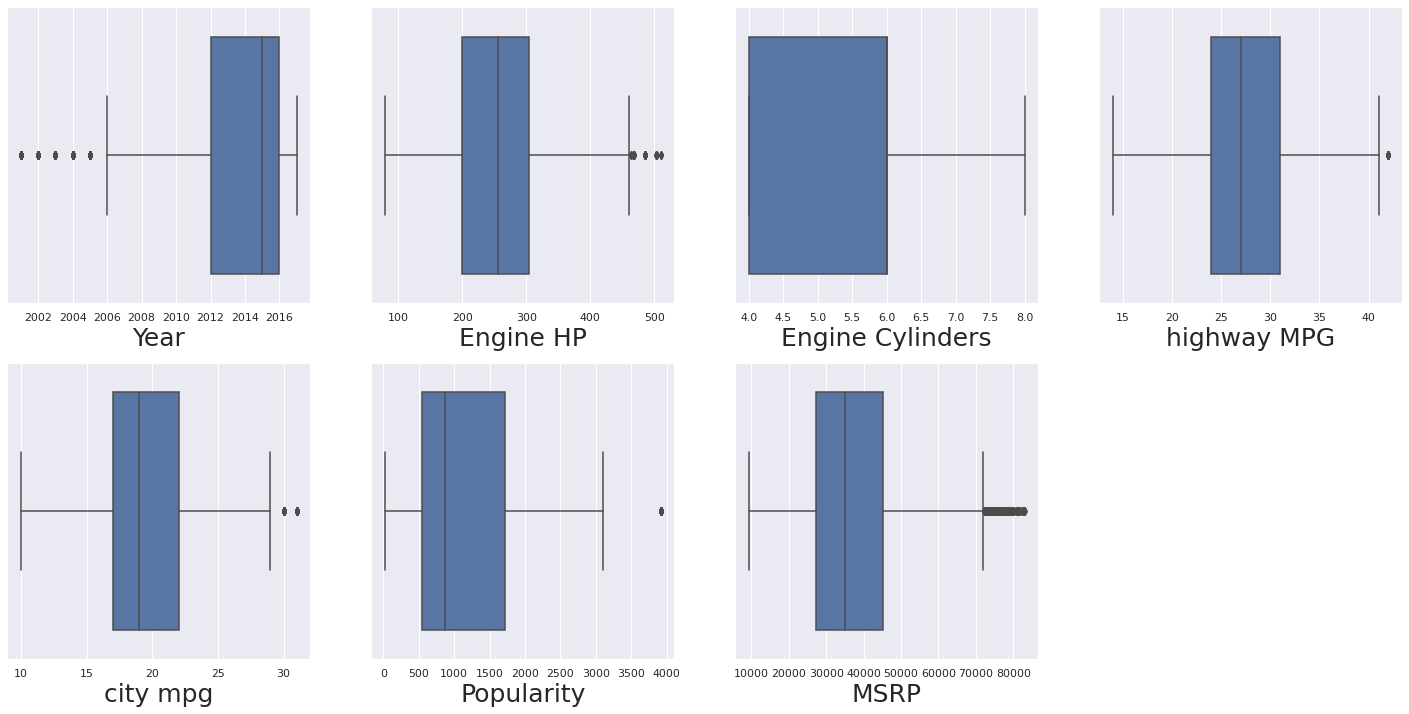

In [17]:
data = df
fig, axes =plt.subplots(2,4,figsize=(25,12))
ax= sns.boxplot(x="Year",data=data,ax=axes[0,0])
ax.set_xlabel("Year",fontsize=25)
ax= sns.boxplot(x="Engine HP",data=data,ax=axes[0,1])
ax.set_xlabel("Engine HP",fontsize=25)
ax= sns.boxplot(x="Engine Cylinders",data=data,ax=axes[0,2])
ax.set_xlabel("Engine Cylinders",fontsize=25)
ax= sns.boxplot(x="highway MPG",data=data,ax=axes[0,3])
ax.set_xlabel("highway MPG",fontsize=25)
ax= sns.boxplot(x="city mpg",data=data,ax=axes[1,0])
ax.set_xlabel("city mpg",fontsize=25)
ax= sns.boxplot(x="Popularity",data=data,ax=axes[1,1])
ax.set_xlabel("Popularity",fontsize=25)
ax= sns.boxplot(x="MSRP",data=data,ax=axes[1,2])
ax.set_xlabel("MSRP",fontsize=25)
axes[-1, -1].axis('off')

# Splitting Dataset - Serial Split


In [18]:
from sklearn.model_selection import train_test_split

# Split df into X and y
y = df['MSRP']
X = df.drop('MSRP', axis=1)

# Train-test split (Serial Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=False)

In [19]:
X_train.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916


In [20]:
X_test.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
8584,Nissan,Rogue,2016,regular unleaded,170.0,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Midsize,4dr SUV,33,26,2009
8585,Nissan,Rogue,2016,regular unleaded,170.0,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Midsize,4dr SUV,33,26,2009
8586,Nissan,Rogue,2017,regular unleaded,170.0,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Midsize,4dr SUV,33,26,2009


In [21]:
y_train.head(3)

0    46135
1    40650
2    36350
Name: MSRP, dtype: int64

In [22]:
y_test.head(3)

8584    24780
8585    23330
8586    23820
Name: MSRP, dtype: int64

## Hypothesis Testing

**Sample 1**:
y_train, having Mean = μ1

**Sample 2**:
y_test, having Mean = μ2

<br>

Null Hypothesis (H0) : μ1 == μ2 <br>
Alternative Hypothesis (H1) : μ1 != μ2 <br><br>


We perform t-test on the two samples.




In [23]:
from scipy import stats

t_value,p_value=stats.ttest_ind(y_train, y_test, equal_var=True)
print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f'%p_value)

Test statistic is 4.305938
p-value for two tailed test is 0.000017


In [24]:
alpha = 0.05
if p_value<=alpha:
  print('Reject H0. The mean of training and testing datasets are not equal.')
else:
  print('We fail to reject H0. The mean of training and testing datasets are equal.')

Reject H0. The mean of training and testing datasets are not equal.


## Distribution Plot

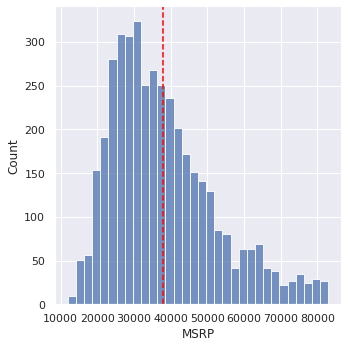

In [25]:
sns.displot(y_train)
plt.axvline(x=y_train.mean(),color='red',ls='--')

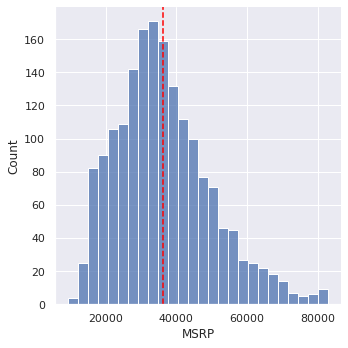

In [26]:
sns.displot(y_test)
plt.axvline(x=y_test.mean(),color='red',ls='--')

Inference:
- The distribution curves of training and testing data sets show a lot of difference for every interval.
- The curves for both have high difference between the mean values, proving the dataset samples are not similar.

# Splitting Dataset - Random Split


In [27]:
from sklearn.model_selection import train_test_split

# Split df into X and y
y = df['MSRP']
X = df.drop('MSRP', axis=1)

# Train-test split (Random Split)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

In [28]:
X_train.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
11292,Toyota,Venza,2015,regular unleaded,181.0,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Midsize,Wagon,26,20,2031
4901,Scion,FR-S,2016,premium unleaded (required),200.0,4.0,MANUAL,rear wheel drive,2.0,Performance,Compact,Coupe,30,22,105
3940,Buick,Encore,2015,regular unleaded,138.0,4.0,AUTOMATIC,front wheel drive,4.0,Crossover,Compact,4dr SUV,33,25,155


In [29]:
X_test.head(3)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity
1147,GMC,Acadia,2015,regular unleaded,288.0,6.0,AUTOMATIC,all wheel drive,4.0,Crossover,Midsize,4dr SUV,23,16,549
6761,Acura,MDX,2015,premium unleaded (recommended),290.0,6.0,AUTOMATIC,front wheel drive,4.0,"Crossover,Luxury",Midsize,4dr SUV,28,20,204
9264,GMC,Sierra 1500 Classic,2007,flex-fuel (unleaded/E85),295.0,8.0,AUTOMATIC,rear wheel drive,4.0,Flex Fuel,Large,Extended Cab Pickup,19,14,549


In [30]:
y_train.head(3)

11292    32110
4901     25305
3940     24065
Name: MSRP, dtype: int64

In [31]:
y_test.head(3)

1147    49690
6761    42565
9264    27730
Name: MSRP, dtype: int64

## Hypothesis Testing

**Sample 1**:
y_train, having Mean = μ1

**Sample 2**:
y_test, having Mean = μ2

<br>

Null Hypothesis (H0) : μ1 == μ2 <br>
Alternative Hypothesis (H1) : μ1 != μ2 <br><br>


We perform t-test on the two samples.




In [32]:
from scipy import stats

t_value,p_value=stats.ttest_ind(y_train, y_test, equal_var=True)
print('Test statistic is %f'%float("{:.6f}".format(t_value)))
print('p-value for two tailed test is %f'%p_value)

Test statistic is -0.508847
p-value for two tailed test is 0.610878


In [33]:
alpha = 0.05
if p_value<=alpha:
  print('Reject H0. The mean of training and testing datasets are not equal.')
else:
  print('We fail to reject H0. The mean of training and testing datasets are equal.')

We fail to reject H0. The mean of training and testing datasets are equal.


## Distribution Plot

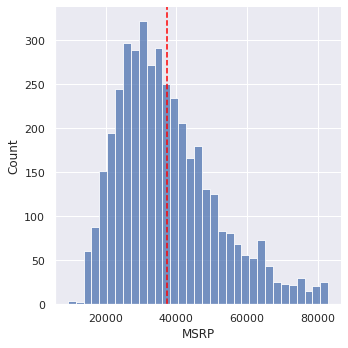

In [34]:
sns.displot(y_train)
plt.axvline(x=y_train.mean(),color='red',ls='--')

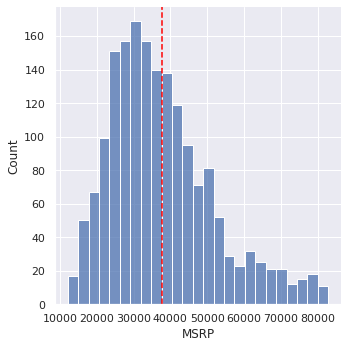

In [35]:
sns.displot(y_test)
plt.axvline(x=y_test.mean(),color='red',ls='--')

Inference:
- The distribution curves of training and testing data sets are skewed to the right. (Right-Skewed Distribution Curves)
- The curves for both are very similar with the mean value being almost the same, proving the dataset samples are similar too.